In [24]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [7]:
mol = "CO2"
mol_path = f'./{mol}'

In [8]:
df = pd.read_csv(f'CO2_deriv_x.csv')

In [15]:
df

,time,pred_polar_x,deriv
0,0.0000,0.041919,NaN
1,0.0014,0.042043,0.088768
2,0.0029,0.042166,0.082020
3,0.0043,0.042282,0.082671
4,0.0058,0.042386,0.069836
...,...,...,...
19995,29.0193,0.042996,0.065301
19996,29.0208,0.043097,0.067126
19997,29.0222,0.043214,0.084111
19998,29.0237,0.043357,0.095136


In [16]:
time_steps = df.time

In [11]:
# Numpy 1
def autocorrelation1(data):
    mean = np.mean(data)
    var = np.var(data)
    ndata = data - mean
    acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
    acorr = acorr / var / len(ndata)
    return acorr

In [12]:
# Numpy 2
def autocorrelation2(data):
    xp = (data - np.mean(data))/np.std(data)
    result = np.correlate(xp, xp, mode='full')
    return result[result.size//2:]/len(xp)

In [23]:
# acorr1 = autocorrelation1(df.pred_polar_x)
# acorr2 = autocorrelation2(df.pred_polar_x)
# print('Manual - pure python')
# acorr3 = autocorrelation3(df.pred_polar_x)
# print('Fast Fourie Transform Numpy')
# accor4 = autocorrelation4(df.pred_polar_x)
# print('Fast Fourie Transform Numpy 2')
# accor5 = autocorrelation5(df.pred_polar_x)

Fast Fourie Transform Numpy 2


NameError: name 'n' is not defined

In [70]:
# Too long 
# Manual
def autocorrelation3(x):
    maxdelay = len(x)//5
    N = len(x)
    mean = np.mean(x)
    var = np.var(x)
    xp = (x - mean)/np.sqrt(var)
    autocorrelation = np.zeros(maxdelay)
    for r in tqdm(range(maxdelay)):
        for k in range(N-r):
            autocorrelation[r] += xp[k]*xp[k+r]
        autocorrelation[r] /= float(N-r)
    return autocorrelation

In [ ]:
# Too long
# Fast Fourie Transform
def autocorrelation4(x):
    xp = ifftshift((x - np.average(x))/np.std(x))
    n, = xp.shape
    xp = np.r_[xp[:n//2], np.zeros_like(xp), xp[n//2:]]
    f = fft(xp)
    p = np.absolute(f)**2
    pi = ifft(p)
    return np.real(pi)[:n//2]/(np.arange(n//2)[::-1]+n//2)

In [22]:
# # Fast Fourie Transform 2
# def autocorrelation5(a):
#     a = np.concatenate((a,np.zeros(len(a)-1))) # added zeros to your signal
#     A = np.fft.fft(a)
#     S = np.conj(A)*A
#     c_fourier = np.fft.ifft(S)
#     c_fourier = c_fourier[:(c_fourier.size//2)+1]
#     return np.real(np.pi)[:n//2]/(np.arange(n//2)[::-1]+n//2)

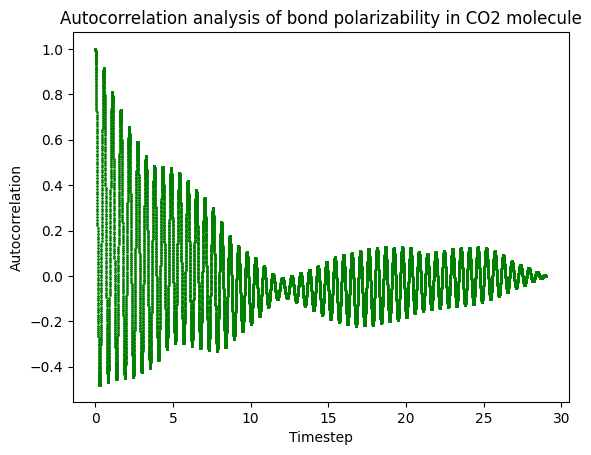

<Figure size 3500x2000 with 0 Axes>

In [19]:
# Difference of different ways of autocorrelation
size = len(acorr1)
# size = 1000

fig, ax = plt.subplots();
# ax.scatter(x=time_steps[:size], y=acorr1[:size], c='g', s=1);
# ax.scatter(x=time_steps[:size], y=acorr2[:size], c='r', s=1);
# ax.scatter(x=time_steps[:1000], y=acorr3[:1000], c='b', s=1); # Too long
# ax.scatter(x=time_steps[:1000], y=acorr4[:1000], c='o', s=5); # Too long
# ax.scatter(x=time_steps[:1000], y=acorr5[:1000], c='o', s=5); #?
plt.title(f"Autocorrelation analysis of bond polarizability in {mol} molecule");
plt.ylabel('Autocorrelation');
plt.xlabel('Timestep');
plt.figure(figsize=(35,20));
plt.show()

In [30]:
df_out = pd.read_table(f'raman_fortran.out', sep='\s+', names=['wavenum','raman'])
df_out

,wavenum,raman
0,-11904.1670,5.292809e-28
1,-11902.9756,5.423524e-28
2,-11901.7861,5.577471e-28
3,-11900.5957,5.386533e-28
4,-11899.4043,5.465228e-28
...,...,...
19994,11899.4043,9.031858e-06
19995,11900.5957,8.945288e-06
19996,11901.7861,9.307576e-06
19997,11902.9756,9.094883e-06


In [ ]:
plt.figure();
# plt.vlines(x=freqs[:size], ymin=0, ymax=raman_intensity[:size])
plt.plot(freqs[:size], df_out.raman)
plt.title(f"Raman spectra of {mol} molecule");
plt.xlabel("Frequency (cm-1)")
plt.ylabel("Raman Intensity")
# plt.xlim([-2000, 2000])
# plt.xlim([1000, 1500])
plt.xlim([0, 1400])
plt.grid()
# plt.show()
plt.savefig(f'{mol}_raman.png')